In [95]:
import pickle
import pandas as pd
import numpy as np
import sqlalchemy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [23]:
weather_db = pd.read_csv("weather.csv", index_col = 0)
availability_db = pd.read_csv("avail.csv")

In [18]:
X = get_features(station=station_id)
y = get_availability(station=station_id)
X_train, X_test, y_train, y_test = train_test_split(X, y)
#model used 
model[station_id] = LogisticRegression() 
model[station_id].fit(X_train, y_train)
# define new instance 
Xnew = [[date]] # query features
# make a prediction
ynew = model[station_id].predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

NameError: name 'get_features' is not defined

# Model - serialising

In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)
with open ("model.pickle", "wb") as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

NameError: name 'X_train' is not defined

# Model Deserialising

In [ ]:
with open("model.pkl", "rb") as handle:
    model = pickle.load(handle)

In [ ]:
@route("/predict")
# X is the feature we want to predict the outcome
def predict(X_test):
    results = model.predict(X_test)
    return jsonify(results)

# Model Frontend

# Javascript

In [ ]:
$(document).on("click", "#sumbit", funtion() {
    var date = date_.value;
    var month = month_.value;
    var year = year_.value;
    var station = station_.value;
    # passing date and station to url
    var URL = Base + "/predict/?date=" + date + "&station=" + station
    $.getJSON(URL, funtion(data) {
    console.log(data); # logging data on console 
    prediction = data["prediction"]; 
});
});



In [36]:
# Import required libraries

from sklearn.model_selection import train_test_split

# Load weather and bike stand data from CSV files
weather_db = pd.read_csv("weather.csv")
availability_db = pd.read_csv("avail.csv", index_col = 0)

# Add a new column to bike stand data with unique identifiers
weather_db["id"] = range(len(weather_db))
#availability_db["id"] = range(len(availability_db))

weather_db.head(5)
#availability_db.head(5)

,time,cord_long,cord_lat,weather_main,main_temp,main_humidity,wind_speed,wind_degree,sys_sunset,sys_sunrise,id
0,2023-03-30 13:53:20,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,0
1,2023-03-30 13:55:03,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,1
2,2023-03-30 14:11:04,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,2
3,2023-03-30 14:11:26,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,3
4,2023-03-30 14:15:02,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,4


In [38]:
availability_db = availability_db.rename(columns={"number": "id"})

In [43]:
availability_db.head(5)


,available_bikes,last_update,id
available_bike_stands,,,
23,7,2147483647,42
14,6,2147483647,30
21,12,2147483647,54
21,14,2147483647,108
14,16,2147483647,20


In [49]:
#reset index
availability_db = availability_db.reset_index()

In [51]:
availability_db.head(5)

,available_bike_stands,available_bikes,last_update,id
0,23,7,2147483647,42
1,14,6,2147483647,30
2,21,12,2147483647,54
3,21,14,2147483647,108
4,14,16,2147483647,20


In [62]:
dummy_fields = ["weather_main"]
for weather in dummy_fields:
    dummies = pd.get_dummies(weather_db[weather], prefix=weather, drop_first=False)
    weather_db = pd.concat([weather_db, dummies], axis=1)
    
weather_db.head(5)

,time,cord_long,cord_lat,weather_main,main_temp,main_humidity,wind_speed,wind_degree,sys_sunset,sys_sunrise,...,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Mist,weather_main_Rain,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Mist,weather_main_Rain
0,2023-03-30 13:53:20,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,...,0,1,0,0,0,0,1,0,0,0
1,2023-03-30 13:55:03,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,...,0,1,0,0,0,0,1,0,0,0
2,2023-03-30 14:11:04,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,...,0,1,0,0,0,0,1,0,0,0
3,2023-03-30 14:11:26,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,...,0,1,0,0,0,0,1,0,0,0
4,2023-03-30 14:15:02,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,...,0,1,0,0,0,0,1,0,0,0


In [67]:
weather_db.to_csv("weather1.csv")
weather_1 = pd.read_csv("weather1.csv")

In [80]:
X = pd.merge(weather_1, availability_db, on="id")[["weather_main_Rain", "main_temp", "main_humidity"]]
y = pd.merge(weather_1, availability_db, on="id")[["id", "available_bikes"]]


In [81]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on test data
predictions = model.predict(X_test)

In [82]:
from sklearn.metrics import r2_score

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")


R-squared score: 0.37601444290241737


## decision tree

In [116]:
X = pd.merge(weather_1, availability_db, on="id")[["weather_main_Rain", "main_temp", "main_humidity"]]
y = pd.merge(weather_1, availability_db, on="id")[["id", "available_bikes"]]

In [105]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #random_state=30)

# Create a linear regression model
model = DecisionTreeClassifier(max_depth =3, random_state = 42)

# Train the model
model.fit(X_train, y_train[["available_bikes"]])

# Make predictions on test data
predictions = model.predict(X_test)

In [110]:
X_train

,weather_main_Rain,main_temp,main_humidity
384,0,10.99,92
353,0,10.99,92
136,0,14.92,65
506,1,9.34,93
832,0,6.66,84
...,...,...,...
933,0,10.49,76
124,0,15.90,65
360,0,10.99,92
668,0,8.68,84


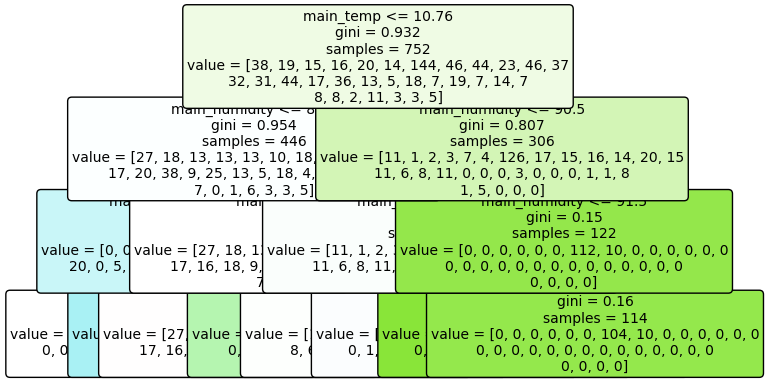

In [114]:
feature_names = X_train.columns
a = tree.plot_tree(model,

                   feature_names = feature_names,

                   #class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=10)

plt.show()

In [118]:
X_test

,weather_main_Rain,main_temp,main_humidity
200,0,9.34,92
558,1,8.68,94
846,0,6.34,84
793,0,9.69,77
689,0,8.35,86
...,...,...,...
818,0,7.09,83
118,0,15.98,70
434,0,10.99,92
721,0,6.97,93


In [134]:
y_test.iloc[3:4]

,id,available_bikes
793,91,21


In [132]:
sample = X_test.iloc[3:4]

In [133]:
model.predict(sample)

array([16])

In [131]:
X_test.iloc[3:4]

,weather_main_Rain,main_temp,main_humidity
793,0,9.69,77


In [ ]:
#save as a pickle file after fit